In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [4]:
import os
print(os.listdir("input"))

['EmployeePerformance.csv']


Leggo i dati

In [13]:
%time data = pd.read_csv('input/EmployeePerformance.csv',sep=';')

data.shape

Wall time: 11 ms


(1000, 8)

In [14]:
data.head(1)

,gender,ethnicity,education,working time,training,problem solving,Dependable,Teamwork
0,female,group B,bachelor's degree,standard,none,72,72,74


In [15]:
data.describe()

,problem solving,Dependable,Teamwork
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Controllo che non ci siano valori nulli

In [16]:
data.isnull().sum().sum()

0

# Data Exploration

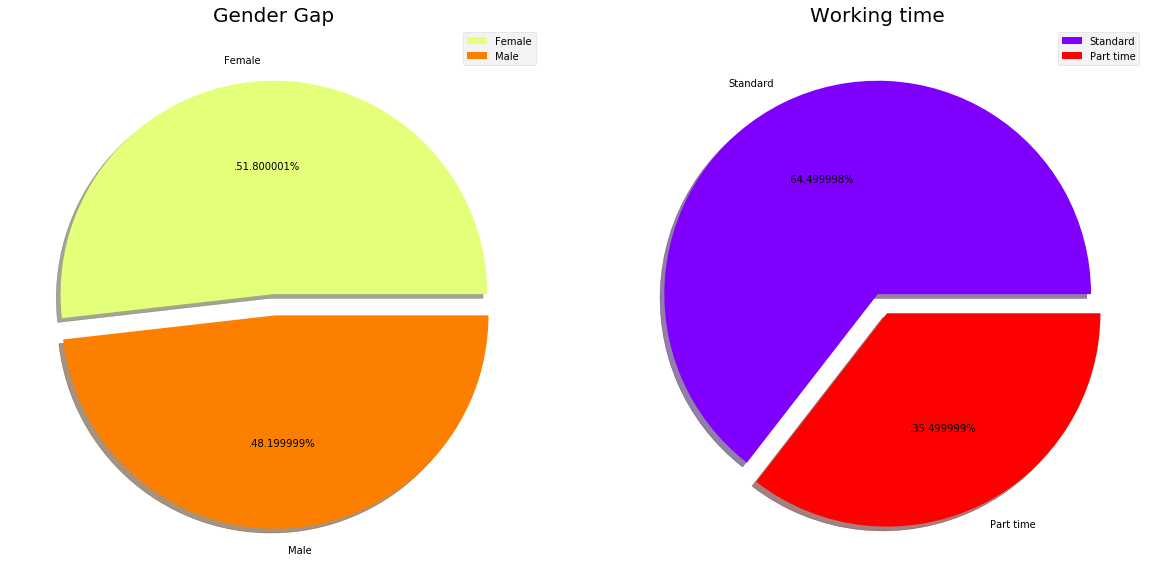

In [20]:
plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]

plt.pie(size, colors = color,  explode = explode, labels = labels, shadow = True, autopct = '.%2f%%')
plt.title('Gender Gap', fontsize = 20)
plt.axis('off')
plt.legend()


plt.subplot(1, 2, 2)
size = data['working time'].value_counts()
labels = 'Standard', 'Part time'
color = plt.cm.rainbow(np.linspace(0, 1, 2))
explode = [0, 0.1]

plt.pie(size, colors = color,  explode = explode, labels = labels, shadow = True, autopct = '.%2f%%')
plt.title('Working time', fontsize = 20)
plt.axis('off')
plt.legend()
plt.tight_layout()
plt.grid()

plt.show()

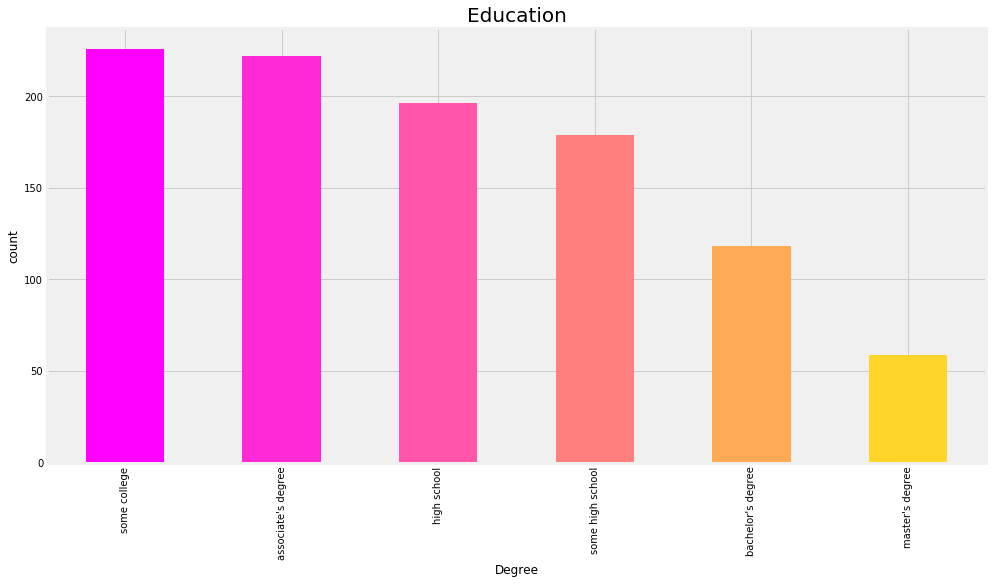

In [21]:
plt.rcParams['figure.figsize'] = (15, 8)
color = plt.cm.spring(np.linspace(0, 1, 7))
data['education'].value_counts(dropna = False).plot.bar(color = color)
plt.title('Education', fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

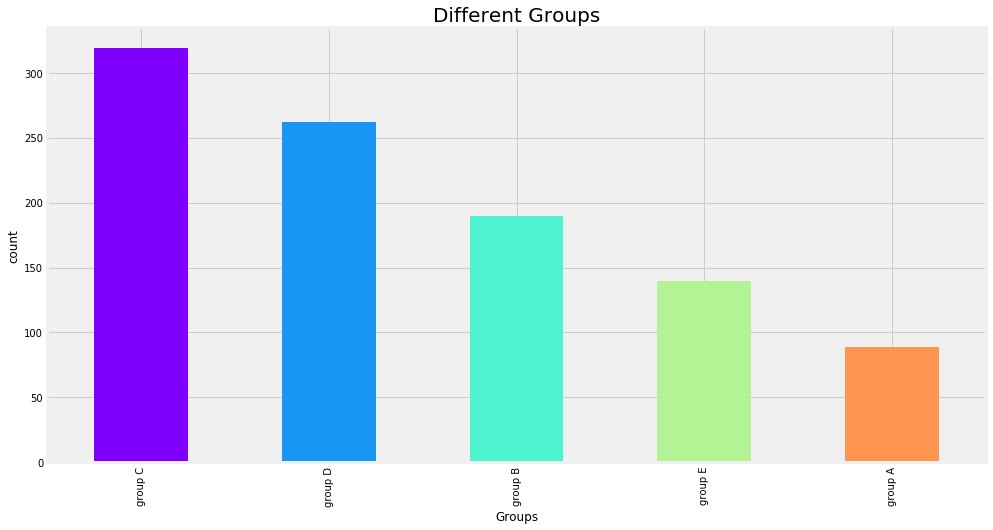

In [23]:
plt.rcParams['figure.figsize'] = (15, 8)
color = plt.cm.rainbow(np.linspace(0, 1, 6))
data['ethnicity'].value_counts(dropna = False).plot.bar(color = color)
plt.title('Different Groups', fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

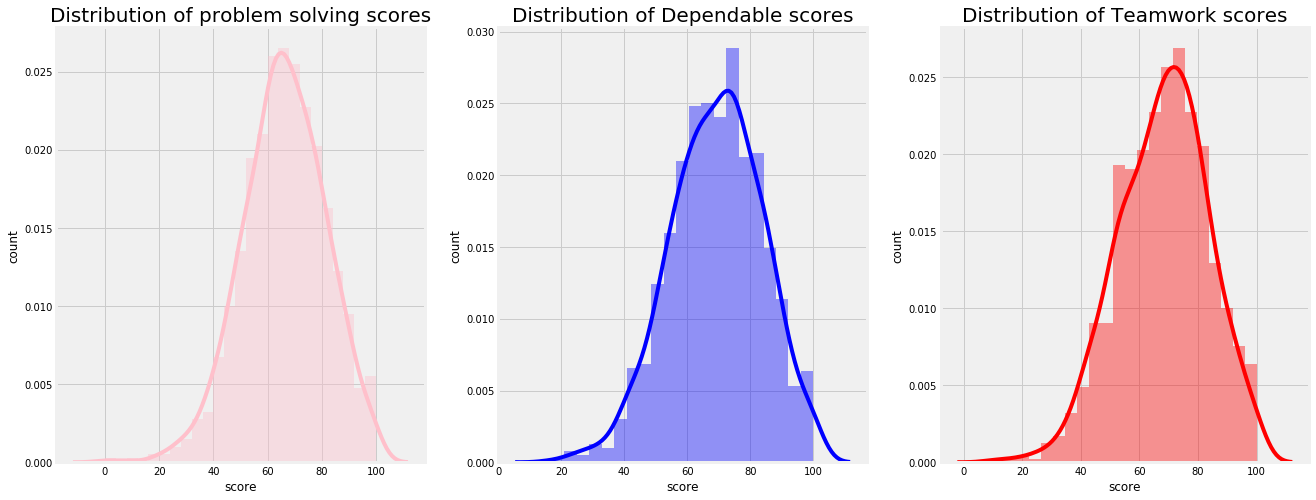

In [26]:
plt.rcParams['figure.figsize'] = (20, 8)

plt.subplot(1, 3, 1)
sns.distplot(data['problem solving'], color = 'pink')
plt.title('Distribution of problem solving scores', fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')

plt.subplot(1, 3, 2)
sns.distplot(data['Dependable'], color = 'blue')
plt.title('Distribution of Dependable scores', fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')

plt.subplot(1, 3, 3)
sns.distplot(data['Teamwork'], color = 'red')
plt.title('Distribution of Teamwork scores', fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')

plt.show()

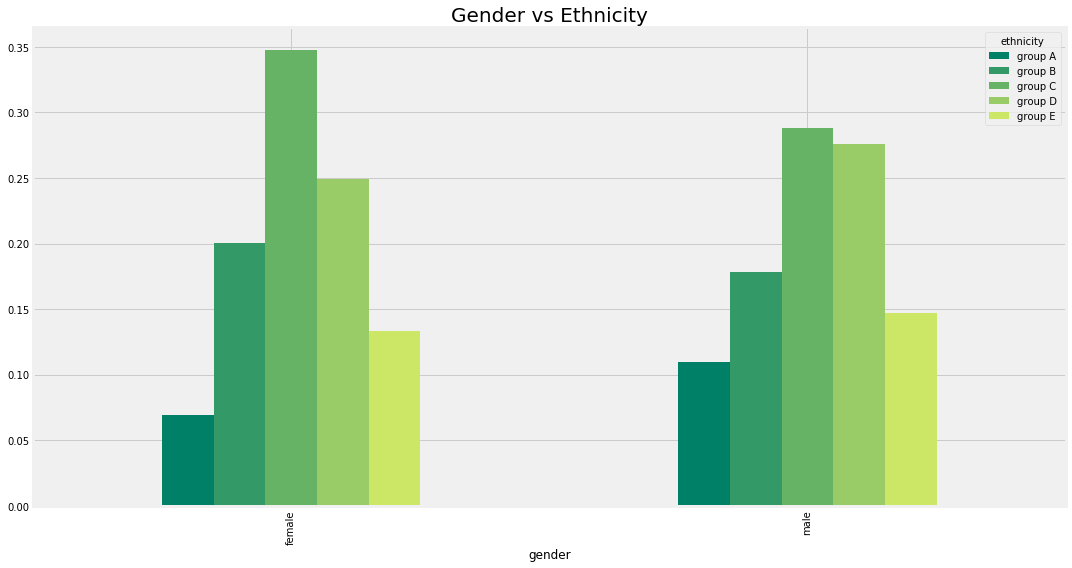

In [27]:
x = pd.crosstab(data['gender'], data['ethnicity'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                             stacked = False,
                                             figsize = (15, 8),
                                             color = plt.cm.summer(np.linspace(0, 1, 6)))

plt.title('Gender vs Ethnicity', fontsize = 20)
plt.grid()
plt.tight_layout()
plt.grid()
plt.show()

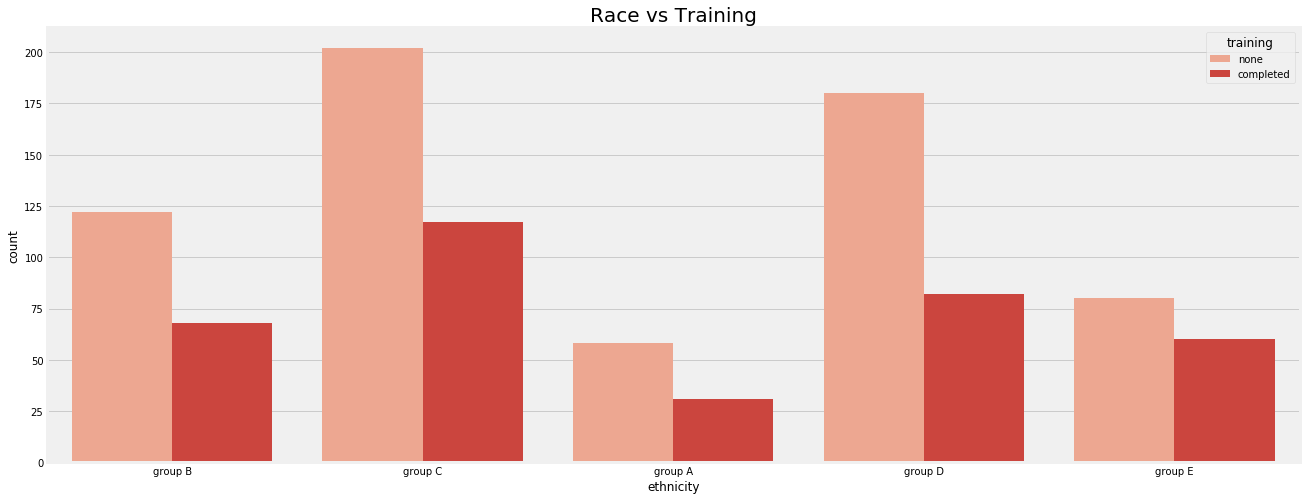

In [28]:
sns.countplot(x = 'ethnicity', data = data,  hue = 'training', palette = 'Reds')
plt.title('Race vs Training', fontsize = 20)
plt.show()

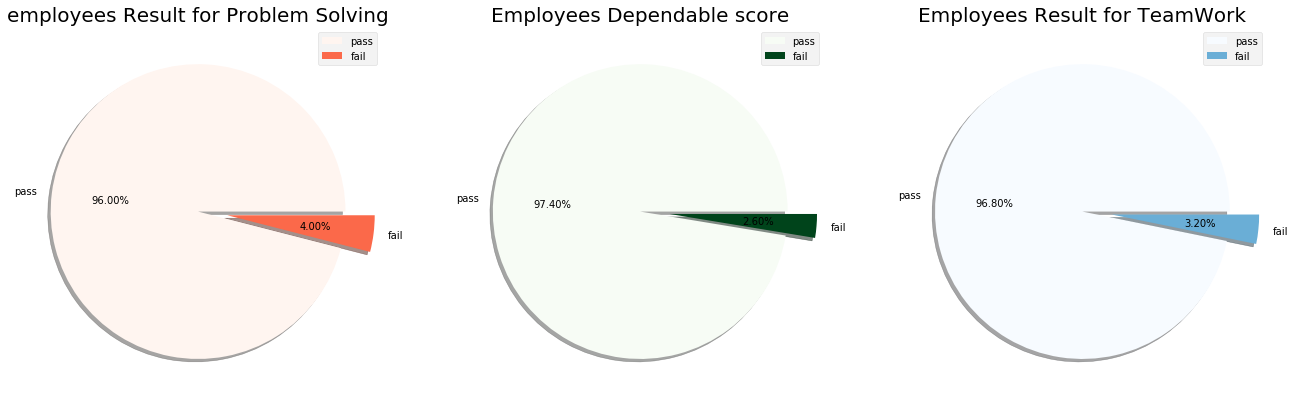

In [29]:
# Settiamo 40 come soglia di risultato che determina il pass rispetto al kpi di rating 
passmarks = 40
plt.rcParams['figure.figsize'] = (20, 10)

# creo nuove colonne che determinano il superamento o no del valore soglia sulle competenze misurate
data['pass_ps'] = np.where(data['problem solving']< passmarks, 'Fail', 'Pass')
data['pass_dependable'] = np.where(data['Dependable']< passmarks, 'Fail', 'Pass')
data['pass_teamwork'] = np.where(data['Teamwork']< passmarks, 'Fail', 'Pass')

# Grafico a torta che rappresenta il rapporto tra superato e non superato tra i dipendenti

size = data['pass_ps'].value_counts()
colors = plt.cm.Reds(np.linspace(0, 1, 3))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 1)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('employees Result for Problem Solving', fontsize = 20)
plt.legend()

size = data['pass_dependable'].value_counts()
colors = plt.cm.Greens(np.linspace(0, 1, 2))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 2)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Employees Dependable score', fontsize = 20)
plt.legend()

size = data['pass_teamwork'].value_counts()
colors = plt.cm.Blues(np.linspace(0, 1, 3))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 3)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Employees Result for TeamWork', fontsize = 20)
plt.legend()

plt.show()


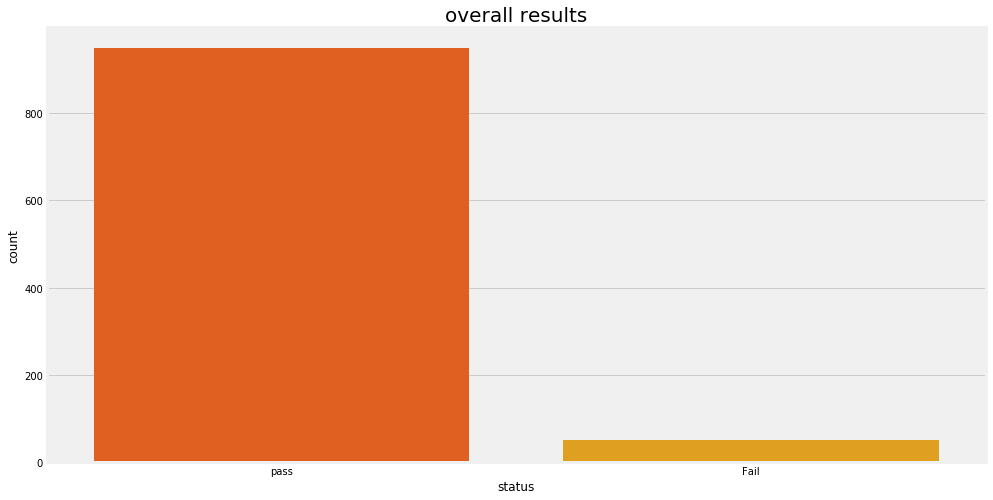

In [31]:
data['status'] = data.apply(lambda x : 'Fail' if x['pass_ps'] == 'Fail' or 
                           x['pass_dependable'] == 'Fail' or x['pass_teamwork'] == 'Fail'
                           else 'pass', axis = 1)

plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(data['status'], palette = 'autumn')
plt.title('overall results', fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [40]:
data['overall rating']=(data['problem solving']+data['Dependable']+data['Teamwork'])/3

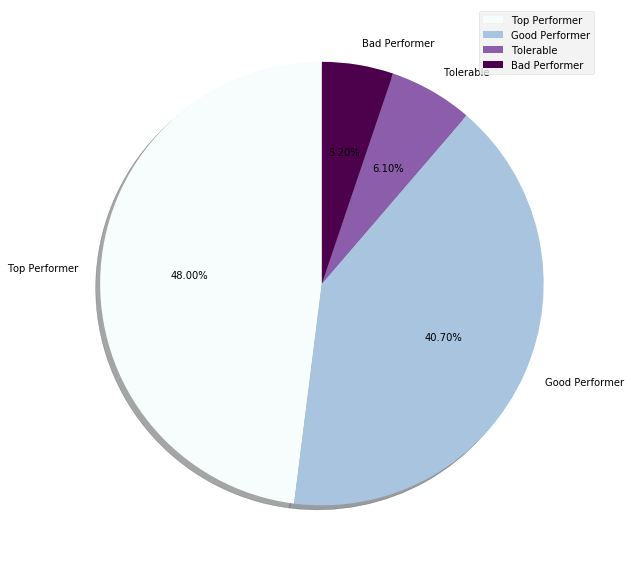

In [48]:
#definisco i cluster rispetto all'overall rating raggiunto dai dipendenti

def getgrade(percentage, status):
  if status == 'Fail':
    return 'Bad Performer'
  if(percentage >= 90):
    return 'Top Performer'
  if(percentage >= 70):
    return 'Good Performer'
  if(percentage >= 45):
    return 'Tolerable'
  else :
    return 'Bad Performer'

data['grades'] = data.apply(lambda x: getgrade(x['overall rating'], x['status']), axis = 1 )

labels = ['Top Performer', 'Good Performer', 'Tolerable', 'Bad Performer']
sizes = data['grades'].value_counts()
colors = plt.cm.BuPu(np.linspace(0, 1, 4))
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

plt.pie(sizes, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.legend(loc = 'upper right')
plt.axis('off')
plt.tight_layout()
plt.show()

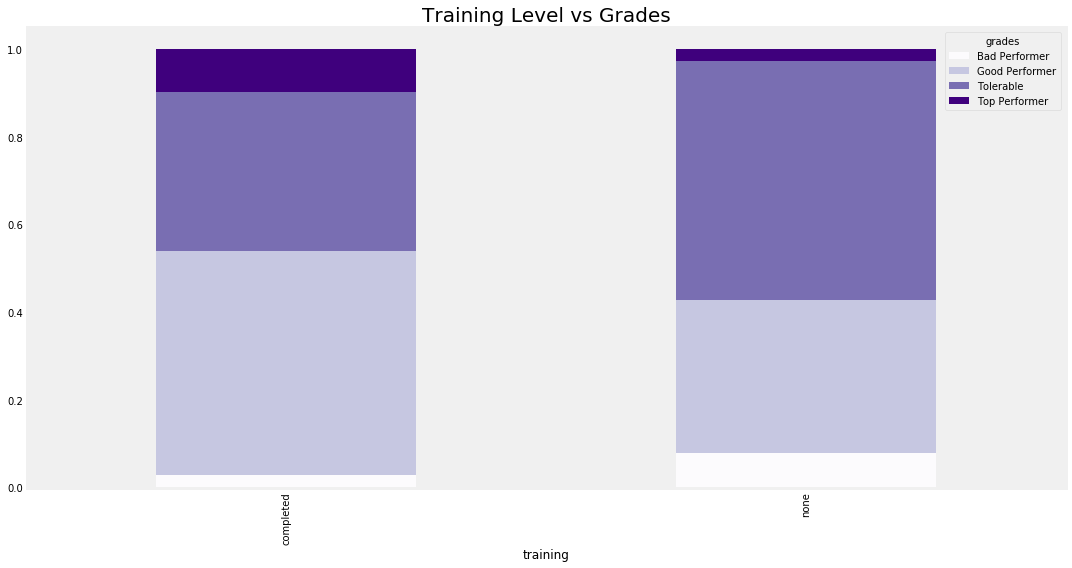

In [53]:
x = pd.crosstab(data['training'], data['grades'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                             stacked = True,
                                             figsize = (15, 8),
                                             color = plt.cm.Purples(np.linspace(0, 1, 4)))

plt.title("Training Level vs Grades", fontsize = 20)
plt.grid()
plt.tight_layout()
plt.show()

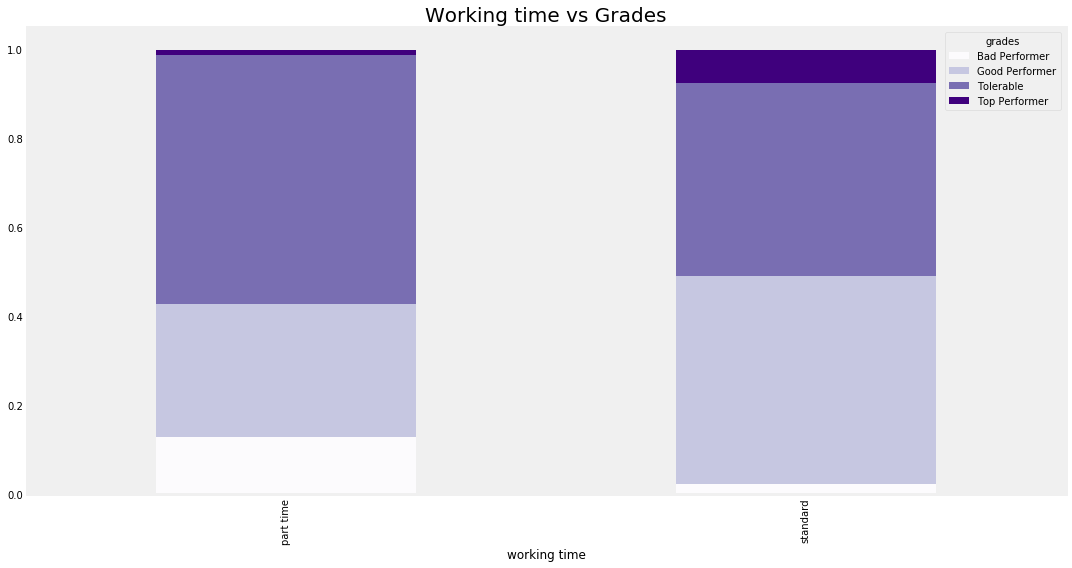

In [54]:
x = pd.crosstab(data['working time'], data['grades'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                             stacked = True,
                                             figsize = (15, 8),
                                             color = plt.cm.Purples(np.linspace(0, 1, 4)))

plt.title("Working time vs Grades", fontsize = 20)
plt.grid()
plt.tight_layout()
plt.show()

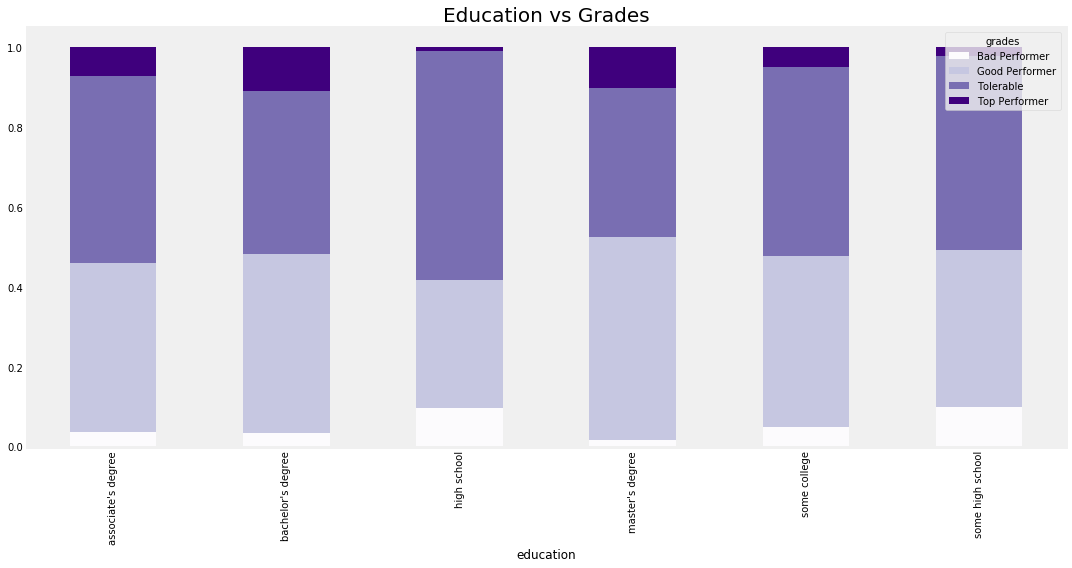

In [55]:
x = pd.crosstab(data['education'], data['grades'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                             stacked = True,
                                             figsize = (15, 8),
                                             color = plt.cm.Purples(np.linspace(0, 1, 4)))

plt.title("Education vs Grades", fontsize = 20)
plt.grid()
plt.tight_layout()
plt.show()

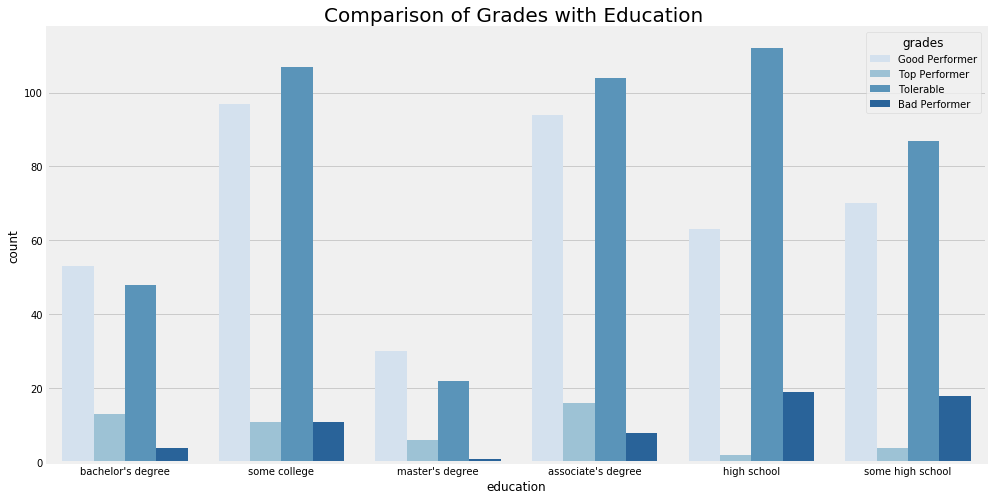

In [57]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(x = data['education'], data = data, hue = data['grades'], palette = 'Blues')
plt.title("Comparison of Grades with Education ", fontsize = 20)
plt.show()

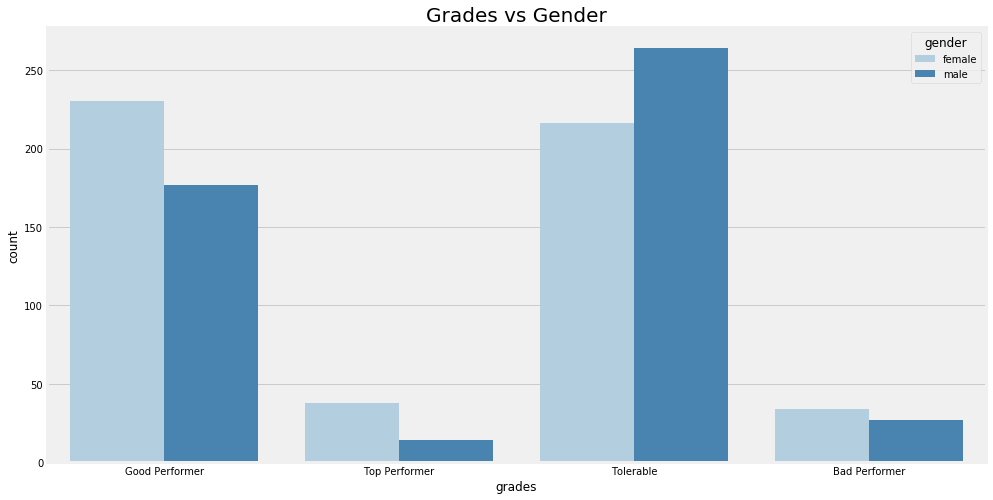

In [60]:
sns.countplot(x = data['grades'], data = data, hue = data['gender'], palette = 'Blues')
plt.title('Grades vs Gender', fontsize = 20)
plt.show()

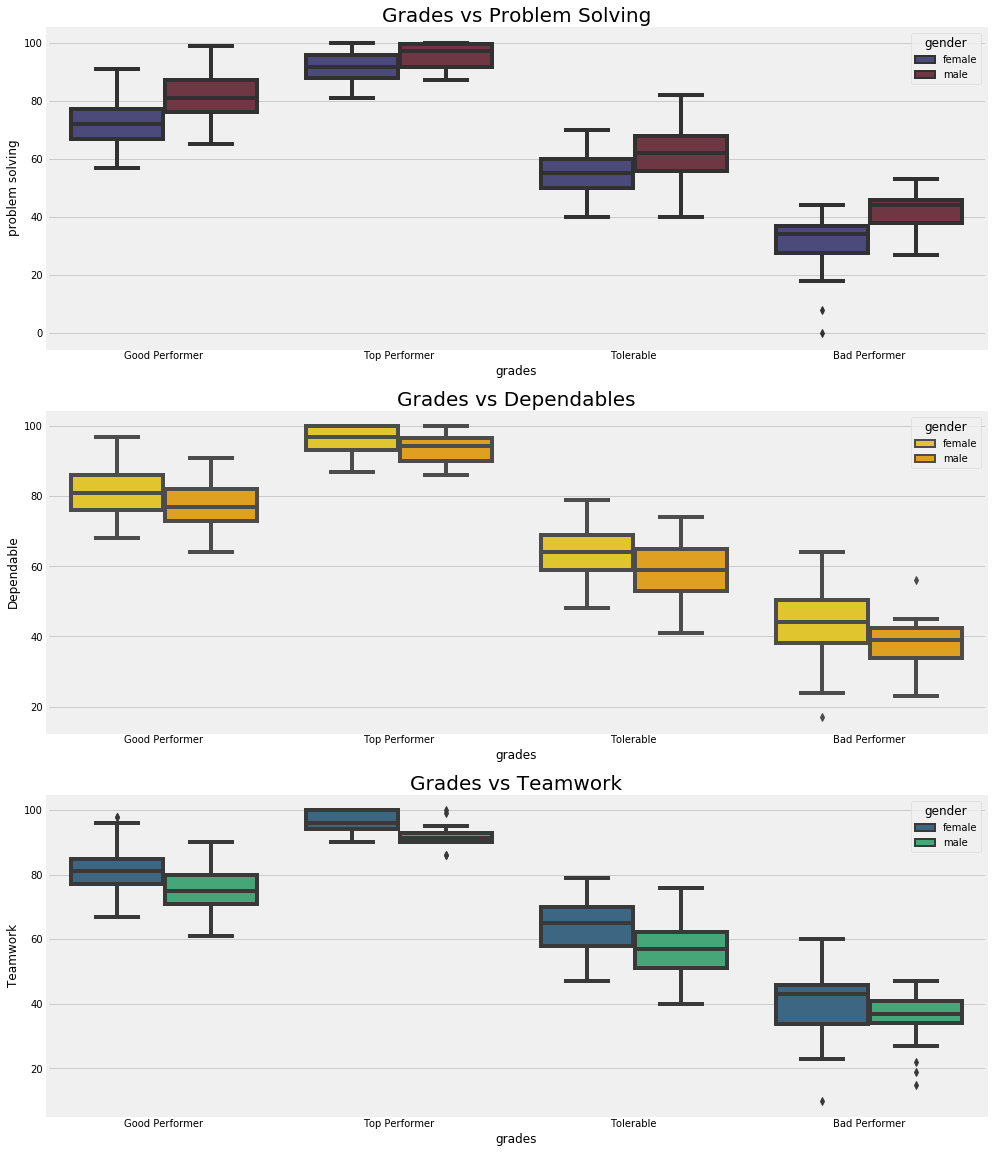

In [61]:
plt.rcParams['figure.figsize'] = (15, 20)

plt.subplot(3, 1, 1)
sns.boxplot(data['grades'], data['problem solving'], hue = data['gender'], palette = 'icefire')
plt.title('Grades vs Problem Solving', fontsize = 20)

plt.subplot(3, 1, 2)
sns.boxplot(data['grades'], data['Dependable'], hue = data['gender'], palette = 'Wistia')
plt.title('Grades vs Dependables', fontsize = 20)

plt.subplot(3, 1, 3)
sns.boxplot(data['grades'], data['Teamwork'], hue = data['gender'], palette = 'viridis')
plt.title('Grades vs Teamwork', fontsize = 20)

plt.show()

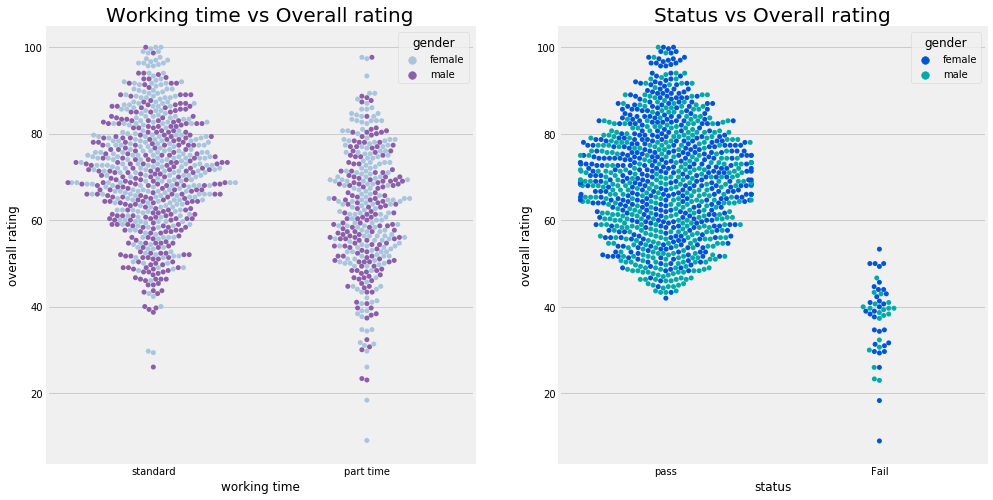

In [65]:

plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(1, 2, 1)
sns.swarmplot(data['working time'], data['overall rating'], hue = data['gender'], palette = 'BuPu')
plt.title('Working time vs Overall rating', fontsize = 20)

plt.subplot(1, 2, 2)
sns.swarmplot(data['status'], data['overall rating'], hue = data['gender'], palette = 'winter')
plt.title('Status vs Overall rating', fontsize = 20)

plt.show()

Text(0.5, 1.0, 'Ethnicity vs Overall Rating vs Working Time')

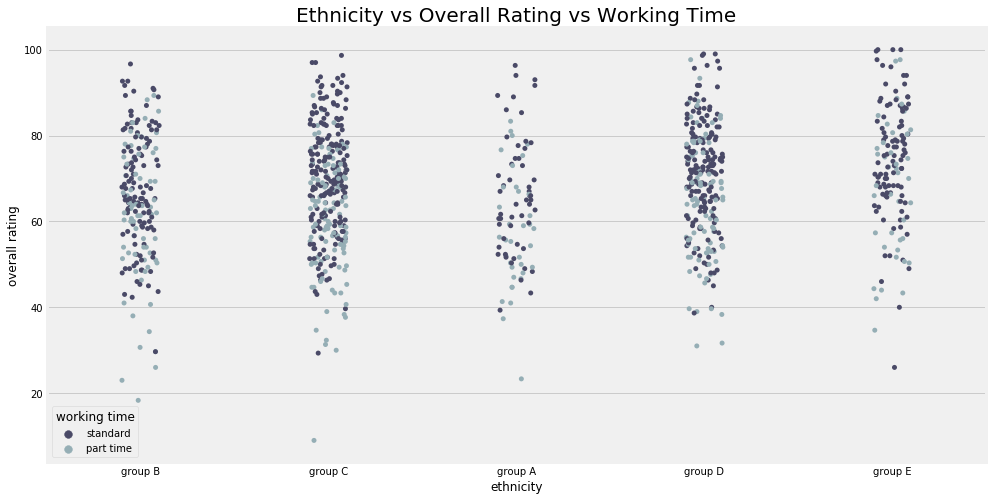

In [68]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.stripplot(data['ethnicity'], data['overall rating'], hue = data['working time'], jitter = True, palette = 'bone')
plt.title('Ethnicity vs Overall Rating vs Working Time', fontsize = 20)

Text(0.5, 1.0, 'Correlations between the attributes')

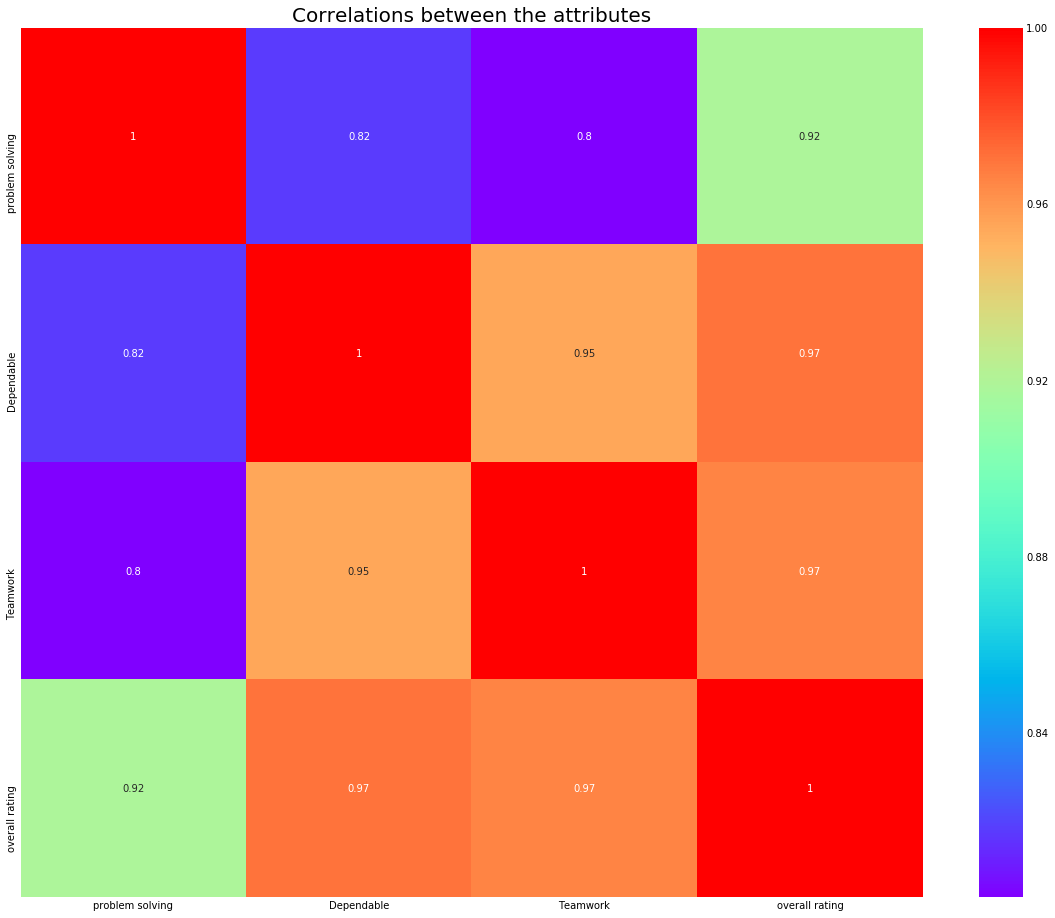

In [69]:
plt.rcParams['figure.figsize'] = (18, 16)
sns.heatmap(data.corr(), cmap = 'rainbow', annot = True)
plt.title('Correlations between the attributes', fontsize = 20)

# Preprocessing

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Codifico le etichette
data['training'] = le.fit_transform(data['training'])
data['working time'] = le.fit_transform(data['working time'])
data['ethnicity'] = data['ethnicity'].replace('group A', 1)
data['ethnicity'] = data['ethnicity'].replace('group B', 2)
data['ethnicity'] = data['ethnicity'].replace('group C', 3)
data['ethnicity'] = data['ethnicity'].replace('group D', 4)
data['ethnicity'] = data['ethnicity'].replace('group E', 5)
data['education'] = le.fit_transform(data['education'])
data['gender'] = le.fit_transform(data['gender'])
data['pass_ps'] = le.fit_transform(data['pass_ps'])
data['pass_dependable'] = le.fit_transform(data['pass_dependable'])
data['pass_teamwork'] = le.fit_transform(data['pass_teamwork'])
data['status'] = le.fit_transform(data['status'])
data['grades'] = data['grades'].replace('Top Performer', 0)
data['grades'] = data['grades'].replace('Good Performer', 1)
data['grades'] = data['grades'].replace('Tolerable', 2)
data['grades'] = data['grades'].replace('Bad Performer', 3)

In [75]:
data.head(1)

,gender,ethnicity,education,working time,training,problem solving,Dependable,Teamwork,pass_ps,pass_dependable,pass_teamwork,status,overall rating,grades
0,0,2,1,1,1,72,72,74,1,1,1,1,72.666667,1


In [111]:
# divido variabili dipendenti e variabili indipendenti
x = data.iloc[:,:8]
y = data.iloc[:,13]

print(x.shape)
print(y.shape)

(1000, 8)
(1000,)


In [112]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 8)
(750,)
(250, 8)
(250,)


In [113]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

c:\users\daniele ligorio\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Logistic Regression

In [114]:
from sklearn.linear_model import  LogisticRegression

model = LogisticRegression(penalty = 'l2', solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.8813333333333333
Testing Accuracy : 0.868


Confusion Matrix

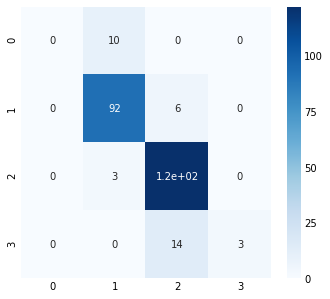

In [115]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'Blues')

Classification Report

In [116]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.88      0.94      0.91        98
           2       0.86      0.98      0.91       125
           3       1.00      0.18      0.30        17

   micro avg       0.87      0.87      0.87       250
   macro avg       0.68      0.52      0.53       250
weighted avg       0.84      0.87      0.83       250



c:\users\daniele ligorio\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\daniele ligorio\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\daniele ligorio\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

# Creazione del modello
model = RandomForestClassifier(n_estimators = 100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Calcolo delle occorrenze
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.948


Confusion Matrix

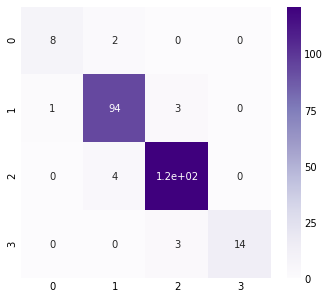

In [118]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'Purples')

In [ ]:
Classification Report

In [119]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.94      0.96      0.95        98
           2       0.95      0.97      0.96       125
           3       1.00      0.82      0.90        17

   micro avg       0.95      0.95      0.95       250
   macro avg       0.95      0.89      0.91       250
weighted avg       0.95      0.95      0.95       250



In [120]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 20)
print(accuracies)
print("media :", accuracies.mean())
print("deviazione standard :", accuracies.std())

[0.95       0.925      1.         0.94871795 0.94736842 0.94736842
 0.97368421 0.92105263 0.94736842 0.94594595 1.         1.
 1.         0.97297297 1.         0.94444444 0.91666667 0.94444444
 1.         1.        ]
media : 0.964251726422779
deviazione standard : 0.029326702399507628


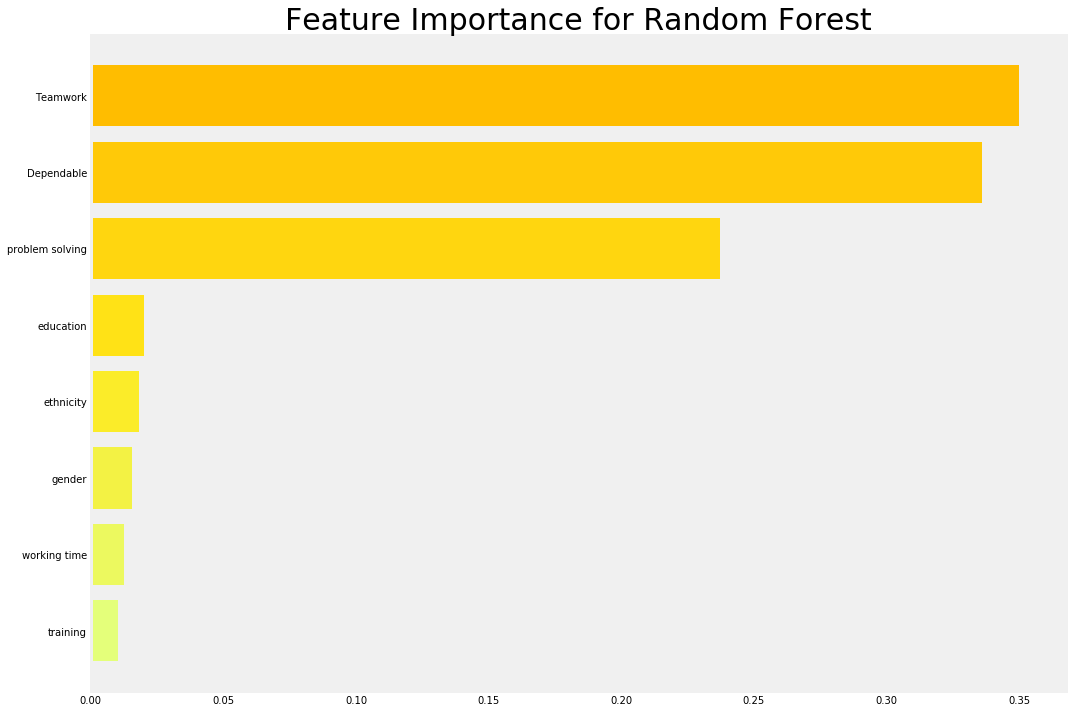

In [121]:
features = data.columns
importance = model.feature_importances_
indices = np.argsort(importance)
color = plt.cm.Wistia(np.linspace(0, 1, 15))

plt.rcParams['figure.figsize'] = (15, 10)
plt.barh(range(len(indices)), importance[indices], color = color)
plt.yticks(range(len(indices)), features[indices])
plt.title('Feature Importance for Random Forest', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()